# `Image Augmentation and transfer learning`
## `Alexnet model`:
![](https://www.researchgate.net/profile/Alexander-Khvostikov/publication/322592079/figure/fig3/AS:584350454263818@1516331413967/AlexNet-architecture-Includes-5-convolutional-layers-and-3-fullyconnected-layers.png)

## `vgg16 model`: (widely used)
![](https://www.researchgate.net/profile/Bibo-Shi/publication/323440752/figure/fig1/AS:739814685032448@1553396974148/The-architecture-of-VGG-16-model-To-represent-different-depth-levels-convolutional.jpg)

## `vgg19 model`:(to dig more than vgg16, extended model of vgg 16)
![](https://www.researchgate.net/profile/Clifford-Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

Using TensorFlow backend.


In [3]:
dataset = r'F:\ASL_dataset'  # r => read mode
train_path = r'F:\ASL_dataset\asl-alphabet-train'
test_path = r'F:\ASL_dataset\asl-alphabet-train'

In [4]:
dirls = os.listdir(train_path)
print('classes :',dirls.__len__())
print(dirls)

classes : 29
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
dirls = os.listdir(test_path)
print('classes :',dirls.__len__())
print(dirls)

classes : 29
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [6]:
def loading_path(path):
    pathnames = []
    dir_list = os.listdir(path)
    uniq_class = sorted(dir_list)
    for i in range(len(uniq_class)):
        new_path = path + '\\' + uniq_class[i]
        pathnames.append(new_path)
    return (pathnames,uniq_class)

In [7]:
path,classes = loading_path(train_path)

In [8]:
def labelling_images(uniq_path, uniq_labels):
    img_path = []
    label = []
    for path,Label in zip(uniq_path,uniq_labels):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + '\\' + i
            img_path.append(img_dir_list)
            label.append(Label)
    return (img_path,label)

In [9]:
img_path,label = labelling_images(path,classes)

In [10]:
img_path[:5]

['F:\\ASL_dataset\\asl-alphabet-train\\A\\A0001_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0002_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0003_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0004_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0005_test.jpg']

In [11]:
label[:5]

['A', 'A', 'A', 'A', 'A']

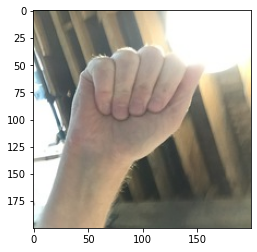

In [12]:
img = cv2.imread(img_path[0])
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### till here steps are same of reading data 

In [13]:
dataset = list(zip(img_path,label))

In [14]:
dataset[:5]

[('F:\\ASL_dataset\\asl-alphabet-train\\A\\A0001_test.jpg', 'A'),
 ('F:\\ASL_dataset\\asl-alphabet-train\\A\\A0002_test.jpg', 'A'),
 ('F:\\ASL_dataset\\asl-alphabet-train\\A\\A0003_test.jpg', 'A'),
 ('F:\\ASL_dataset\\asl-alphabet-train\\A\\A0004_test.jpg', 'A'),
 ('F:\\ASL_dataset\\asl-alphabet-train\\A\\A0005_test.jpg', 'A')]

In [15]:
data = pd.DataFrame(dataset,columns=['Image_path','Labels'])

In [16]:
data.head()

,Image_path,Labels
0,F:\ASL_dataset\asl-alphabet-train\A\A0001_test...,A
1,F:\ASL_dataset\asl-alphabet-train\A\A0002_test...,A
2,F:\ASL_dataset\asl-alphabet-train\A\A0003_test...,A
3,F:\ASL_dataset\asl-alphabet-train\A\A0004_test...,A
4,F:\ASL_dataset\asl-alphabet-train\A\A0005_test...,A


In [17]:
data['Labels'].value_counts()

Q          30
B          30
L          30
I          30
K          30
R          30
D          30
S          30
U          30
W          30
nothing    30
T          30
H          30
Y          30
space      30
V          30
N          30
M          30
F          30
E          30
C          30
A          30
del        30
Z          30
G          30
J          30
P          30
O          30
X          30
Name: Labels, dtype: int64

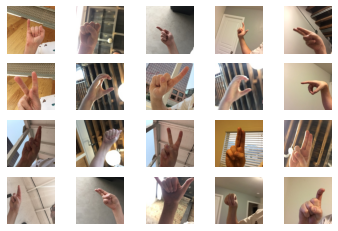

In [22]:
for i in range(20):
    vals = np.random.randint(1,len(data))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(data.Image_path[vals]),cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

### we will split our data and then apply preprocessing

In [27]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [39]:
train,test = train_test_split(data, train_size=0.8, random_state=0)
train_new,valid = train_test_split(train, train_size=0.8, random_state=0)

In [40]:
print(train_new.shape)
print(valid.shape)
print(test.shape)

(556, 2)
(140, 2)
(174, 2)


### preprocessing

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [42]:
train_datagen = ImageDataGenerator(rotation_range=10,width_shift_range=.10,height_shift_range=.10,
                                   shear_range=.10,zoom_range=0.10,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### I will rescale train data later after visualization
### apply our preprocessing

In [43]:
train_gen = train_datagen.flow_from_dataframe(dataframe=train_new,x_col='Image_path',y_col='Labels',batch_size=16,target_size=(155,155),class_mode='categorical',shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe=valid,x_col='Image_path',y_col='Labels',batch_size=16,target_size=(155,155),class_mode='categorical',shuffle=True)

Found 556 validated image filenames belonging to 29 classes.
Found 140 validated image filenames belonging to 29 classes.


In [44]:
test_gen = test_datagen.flow_from_dataframe(dataframe=test,x_col='Image_path',y_col='Labels',batch_size=16,target_size=(155,155),class_mode='categorical',shuffle=True)

Found 174 validated image filenames belonging to 29 classes.


### we have data in dataframe, so flow from dataframe

In [45]:
train_new.head()

,Image_path,Labels
355,F:\ASL_dataset\asl-alphabet-train\L\L0026_test...,L
729,F:\ASL_dataset\asl-alphabet-train\Y\Y0010_test...,Y
499,F:\ASL_dataset\asl-alphabet-train\Q\Q0020_test...,Q
107,F:\ASL_dataset\asl-alphabet-train\D\D0018_test...,D
583,F:\ASL_dataset\asl-alphabet-train\T\T0014_test...,T


In [48]:
train_gen[0][0].shape  # 16 is batch size

(16, 155, 155, 3)

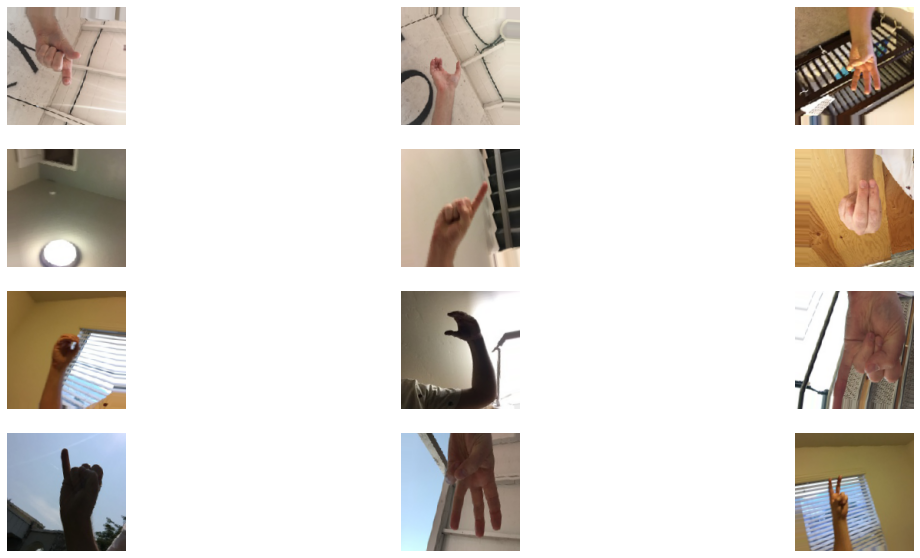

In [51]:
plt.figure(figsize=(20,10))
for i in range(12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

### Now do rescaling of train data as we have visualized

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=10,width_shift_range=.10,height_shift_range=.10,
                                   shear_range=.10,zoom_range=0.10,horizontal_flip=True,vertical_flip=True)

In [53]:
train_gen = train_datagen.flow_from_dataframe(dataframe=train_new,x_col='Image_path',y_col='Labels',batch_size=16,target_size=(155,155),class_mode='categorical',shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe=valid,x_col='Image_path',y_col='Labels',batch_size=16,target_size=(155,155),class_mode='categorical',shuffle=True)

Found 556 validated image filenames belonging to 29 classes.
Found 140 validated image filenames belonging to 29 classes.


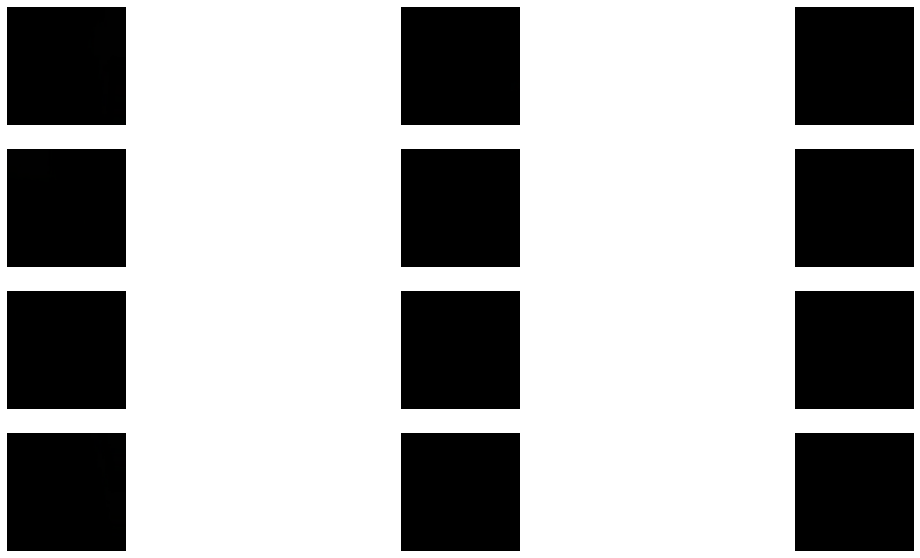

In [54]:
plt.figure(figsize=(20,10))
for i in range(12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

### see it's all black after scaling

## model building

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,Dense,Dropout,GlobalAveragePooling2D

In [61]:
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet',input_shape=(155,155,3),include_top=False)
# we want to add some other layers so False

network = Sequential()
network.add(base_model)
network.add(GlobalAveragePooling2D())
network.add(Dense(128,activation='relu'))
network.add(Dropout(0.1))
network.add(Dense(29,activation='softmax'))

In [62]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 29)                3741      
Total params: 14,784,093
Trainable params: 14,784,093
Non-trainable params: 0
_________________________________________________________________


In [64]:
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
network.fit(train_gen,epochs=10,validation_data=valid_gen,verbose=2)

Epoch 1/10
35/35 - 373s - loss: 3.4748 - accuracy: 0.0216 - val_loss: 3.3685 - val_accuracy: 0.0143
Epoch 2/10
35/35 - 366s - loss: 3.3675 - accuracy: 0.0270 - val_loss: 3.3688 - val_accuracy: 0.0143
Epoch 3/10
35/35 - 385s - loss: 3.3664 - accuracy: 0.0414 - val_loss: 3.3706 - val_accuracy: 0.0143
Epoch 4/10
35/35 - 342s - loss: 3.3657 - accuracy: 0.0396 - val_loss: 3.3722 - val_accuracy: 0.0143
Epoch 5/10
35/35 - 322s - loss: 3.3648 - accuracy: 0.0432 - val_loss: 3.3735 - val_accuracy: 0.0143
Epoch 6/10
35/35 - 328s - loss: 3.3647 - accuracy: 0.0450 - val_loss: 3.3746 - val_accuracy: 0.0143
Epoch 7/10


KeyboardInterrupt: 

# `END ------------------------------`